In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Data collection 
train = pd.read_csv(r"C:\Users\aadya\Desktop\college project\DM Project\Train.csv")
test = pd.read_csv(r"C:\Users\aadya\Desktop\college project\DM Project\Test.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train['source']='train'
test['source']='test'

dataset = pd.concat([train,test], ignore_index = True)
print("Train dataset shape:",train.shape)
print("Test dataset shape:",test.shape)
print("Concatenated dataset shape:",dataset.shape)


Train dataset shape: (8523, 13)
Test dataset shape: (5681, 12)
Concatenated dataset shape: (14204, 13)


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [8]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [9]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [10]:
print(dataset["Item_Outlet_Sales"].isnull().sum()/dataset.shape[0]*100,"%")

39.995775837792166 %


In [11]:
avg = pd.pivot_table(dataset,values='Item_Weight', index='Item_Identifier',aggfunc='mean')
avg

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [12]:
df=dataset[dataset['Item_Identifier'].str.contains("DRA12")]
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
118,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772,train
1197,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158,train
1245,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772,train
1693,DRA12,11.6,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078,train
7467,DRA12,11.6,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924,train
8043,DRA12,11.6,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308,train
9023,DRA12,11.6,Low Fat,0.040946,Soft Drinks,142.9154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
12435,DRA12,NaN,Low Fat,0.040748,Soft Drinks,140.0154,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test
13604,DRA12,11.6,LF,0.041010,Soft Drinks,141.0154,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,test


In [13]:
dataset[:][dataset['Item_Identifier'] == 'DRI11']
def impute(cols):
    Weight = cols[1]
    Identifier = cols[0]
    
    if pd.isnull(Weight):
        return avg['Item_Weight'][avg.index == Identifier]
    else:
        return Weight
print ('Orignal Number of missing values in Item_Weight:',sum(dataset['Item_Weight'].isnull()))

dataset['Item_Weight'] = dataset[['Item_Identifier','Item_Weight']].apply(impute,axis=1).astype(float)

print ('Number of missing values in Item_Weight after imputation: ',sum(dataset['Item_Weight'].isnull()))

Orignal Number of missing values in Item_Weight: 2439
Number of missing values in Item_Weight after imputation:  0


In [14]:
dataset.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [15]:
mode = pd.pivot_table(dataset, values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [16]:
def impute_mode(cols):
    size = cols[1]
    Type = cols[0]
    
    if pd.isnull(size):
        return mode.loc['Outlet_Size'][mode.columns == Type][0]
    else:
        return size
print ('Orignal Number of missing values in Outlet_Size:',sum(dataset['Outlet_Size'].isnull()))

# Applying the impute() function to impute null values of Item_Weight
dataset['Outlet_Size'] = dataset[['Outlet_Type','Outlet_Size']].apply(impute_mode,axis=1)

print ('Number of missing values in Outlet_Size after imputation: ',sum(dataset['Outlet_Size'].isnull()))

Orignal Number of missing values in Outlet_Size: 4016
Number of missing values in Outlet_Size after imputation:  0


In [17]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [18]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [19]:
dataset.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [20]:
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})
dataset.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [21]:
dataset['Outlet_Year'] = 2020 - dataset['Outlet_Establishment_Year']
dataset.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)
dataset.Outlet_Year.unique()

array([21, 11, 22, 33, 35, 18, 13, 23, 16], dtype=int64)

In [22]:
dataset.to_csv('insight.csv')
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,train,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,train,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,train,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,train,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,train,33


In [23]:
vmean = dataset.pivot_table(index = "Item_Identifier",  values = "Item_Visibility")

In [24]:
dataset.loc[(dataset["Item_Visibility"] == 0.0), "Item_Visibility"] = dataset.loc[(dataset["Item_Visibility"] == 0.0), "Item_Identifier"].apply(lambda x : vmean.at[x, "Item_Visibility"])

In [25]:
cat_var = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type','Item_Identifier','Outlet_Identifier']
for i in cat_var:
    p  = dataset[i].value_counts().to_dict()
    dataset[i] = dataset[i].map(p)

In [26]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Year
0,9,9.30,9185,0.016047,1136,249.8092,1550,4655,3980,9294,3735.1380,train,21
1,9,5.92,5019,0.019278,726,48.2692,1546,4655,5583,1546,443.4228,train,11
2,10,17.50,9185,0.016760,736,141.6180,1550,4655,3980,9294,2097.2700,train,21
3,9,19.20,5019,0.017834,2013,182.0950,925,7996,5583,1805,732.3800,train,22
4,9,8.93,9185,0.009780,1548,53.8614,1553,1553,5583,9294,994.7052,train,33


In [27]:
train = dataset.loc[dataset['source']=="train"]
test = dataset.loc[dataset['source']=="test"]
#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

C:\Users\aadya\AppData\Local\Temp\ipykernel_20524\345334756.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['source'],axis=1,inplace=True)
C:\Users\aadya\AppData\Local\Temp\ipykernel_20524\345334756.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['source'],axis=1,inplace=True)


In [28]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year
0,9,9.30,9185,0.016047,1136,249.8092,1550,4655,3980,9294,3735.1380,21
1,9,5.92,5019,0.019278,726,48.2692,1546,4655,5583,1546,443.4228,11
2,10,17.50,9185,0.016760,736,141.6180,1550,4655,3980,9294,2097.2700,21
3,9,19.20,5019,0.017834,2013,182.0950,925,7996,5583,1805,732.3800,22
4,9,8.93,9185,0.009780,1548,53.8614,1553,1553,5583,9294,994.7052,33


In [29]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year
8523,9,20.750,9185,0.007565,1989,107.8622,1550,4655,3980,9294,NaN,21
8524,9,8.300,5019,0.038428,1136,87.3198,1543,7996,4641,9294,NaN,13
8525,9,14.600,9185,0.099575,280,241.7538,925,7996,5583,1805,NaN,22
8526,9,7.315,9185,0.015388,1989,155.0340,1543,7996,4641,9294,NaN,13
8527,9,13.600,5019,0.118599,1136,234.2300,1559,4655,5583,1559,NaN,35


In [30]:
corr_matrix=train.corr()
corr_matrix['Item_Outlet_Sales']

Item_Identifier        -0.073375
Item_Weight             0.013261
Item_Fat_Content       -0.018719
Item_Visibility        -0.128453
Item_Type               0.038123
Item_MRP                0.567574
Outlet_Identifier       0.415482
Outlet_Size            -0.165968
Outlet_Location_Type    0.082256
Outlet_Type             0.100742
Item_Outlet_Sales       1.000000
Outlet_Year             0.049135
Name: Item_Outlet_Sales, dtype: float64

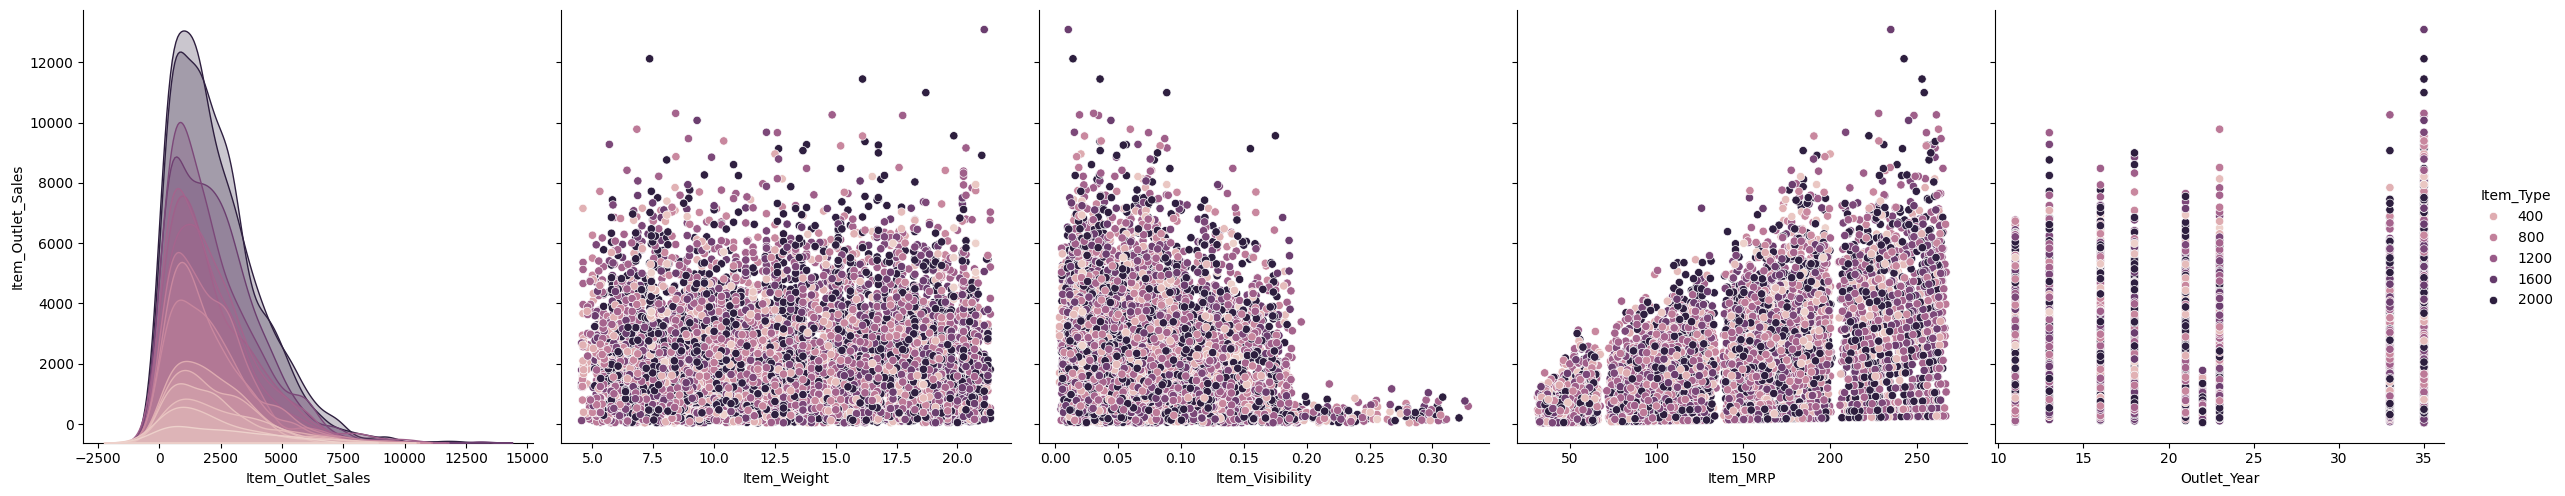

In [31]:
numerical_columns = ['Item_Outlet_Sales', 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Year']

sns.pairplot(train, y_vars=['Item_Outlet_Sales'], x_vars=numerical_columns, hue='Item_Type', height=5)
plt.show()


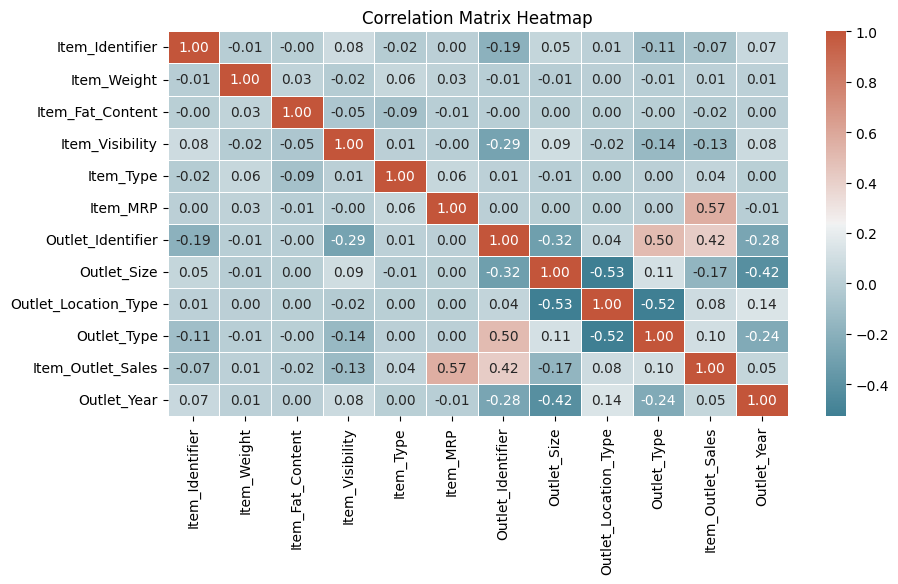

In [32]:
plt.figure(figsize=(10, 5))

cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix Heatmap')

plt.show()


In [33]:
train= train.drop(['Item_Identifier','Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type'],axis=1)

In [34]:
train.skew()

Item_Visibility      1.224502
Item_MRP             0.127202
Outlet_Identifier   -2.244440
Outlet_Size         -0.803252
Outlet_Type         -0.650419
Item_Outlet_Sales    1.177531
Outlet_Year          0.396641
dtype: float64

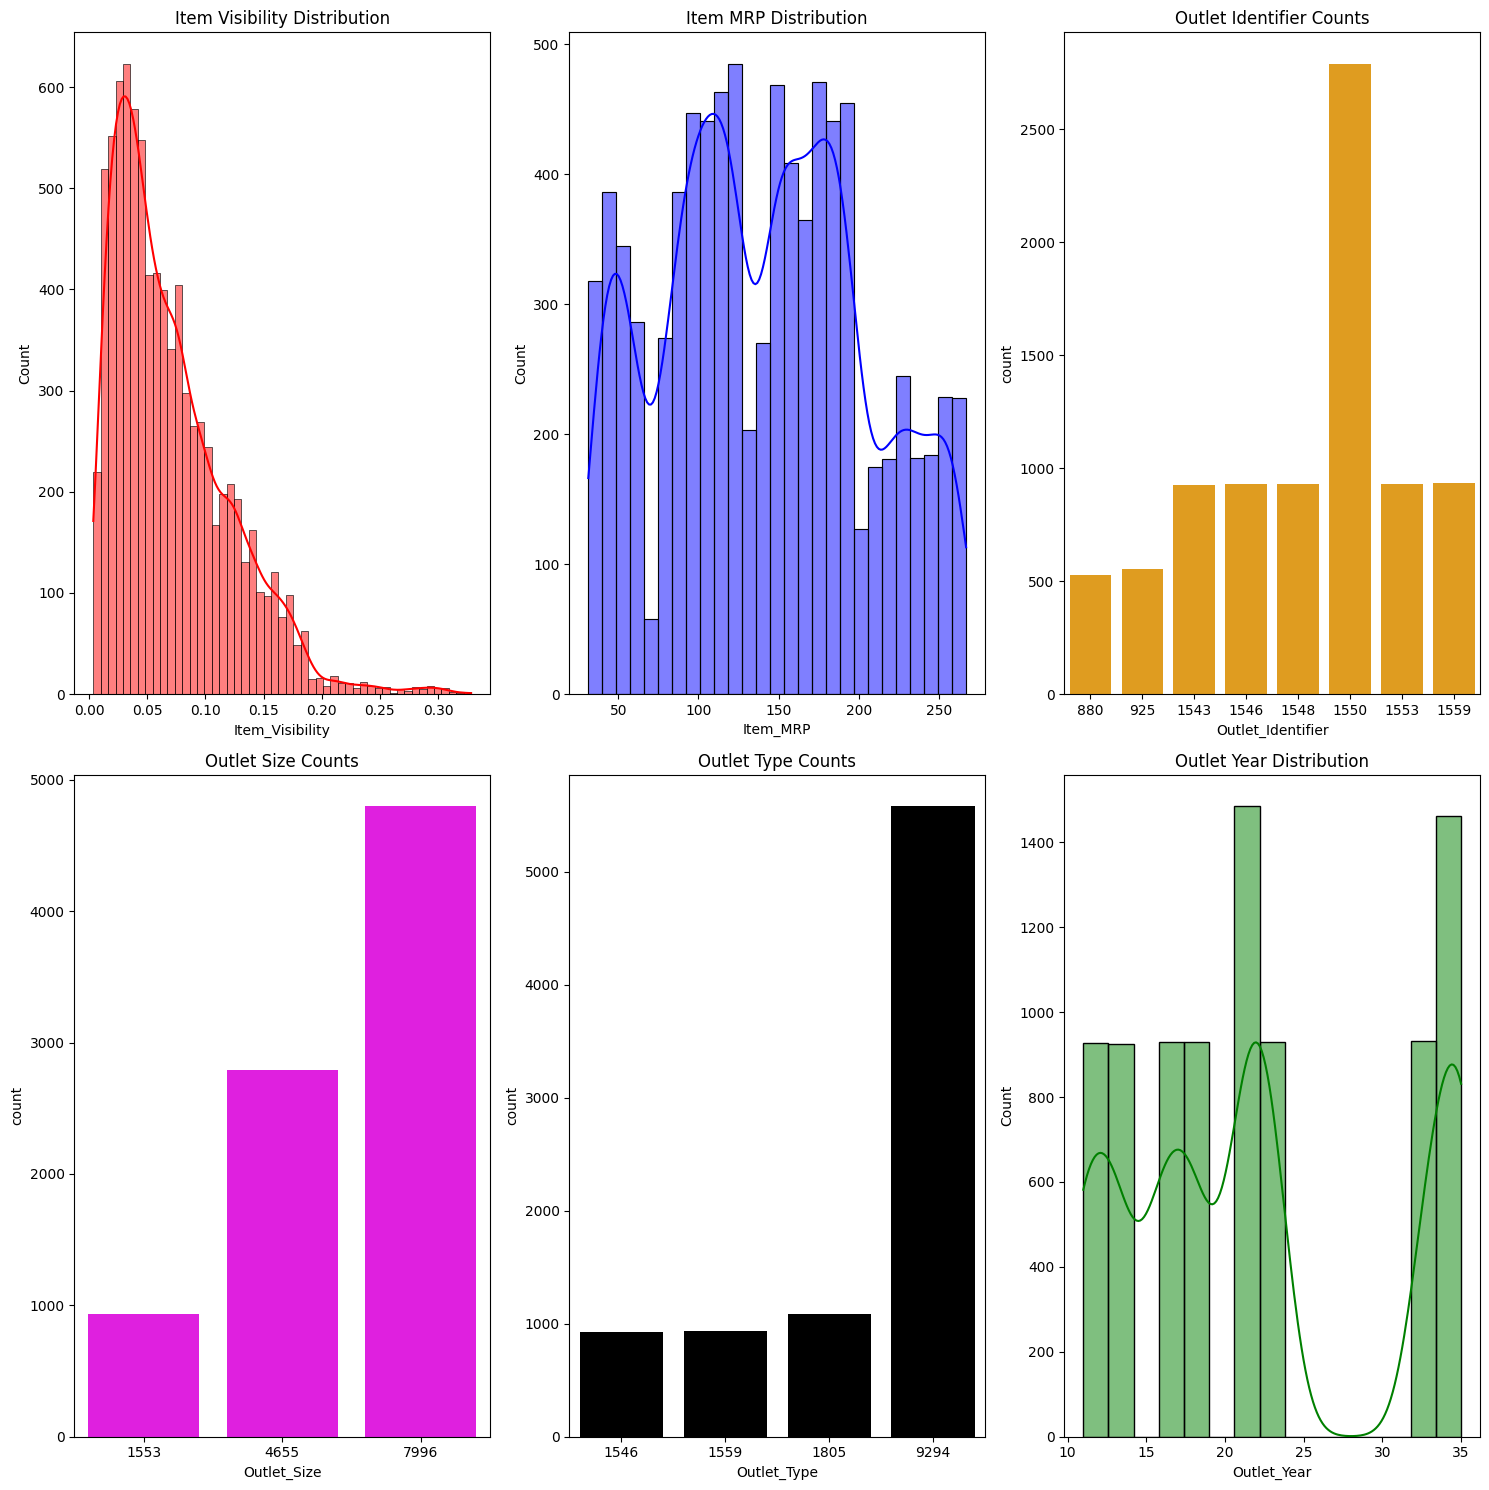

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 3, figsize=(15, 15))

sns.histplot(train["Item_Visibility"], kde=True, ax=ax[0, 0], color="red")
ax[0, 0].set_title("Item Visibility Distribution")

sns.histplot(train["Item_MRP"], kde=True, ax=ax[0, 1], color="blue")
ax[0, 1].set_title("Item MRP Distribution")

sns.countplot(x=train["Outlet_Identifier"], ax=ax[0, 2], color="orange")
ax[0, 2].set_title("Outlet Identifier Counts")

sns.countplot(x=train["Outlet_Size"], ax=ax[1, 0], color="magenta")
ax[1, 0].set_title("Outlet Size Counts")

sns.countplot(x=train["Outlet_Type"], ax=ax[1, 1], color="black")
ax[1, 1].set_title("Outlet Type Counts")

sns.histplot(train["Outlet_Year"], kde=True, ax=ax[1, 2], color="green")
ax[1, 2].set_title("Outlet Year Distribution")

plt.tight_layout()

plt.show()


In [36]:
for i in train.columns:
    train[i] =np.log(train[i])

In [37]:
train.head()

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Item_Outlet_Sales,Outlet_Year
0,-4.132215,5.520697,7.346010,8.445697,9.137124,8.225540,3.044522
1,-3.948780,3.876794,7.343426,8.445697,7.343426,6.094524,2.397895
2,-4.088756,4.953133,7.346010,8.445697,9.137124,7.648392,3.044522
3,-4.026630,5.204529,6.829794,8.986697,7.498316,6.596300,3.091042
4,-4.627433,3.986414,7.347944,7.347944,9.137124,6.902446,3.496508


In [39]:
y=train["Item_Outlet_Sales"]
x= train.drop(["Item_Outlet_Sales"],axis=1)
x.head()

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_Year
0,-4.132215,5.520697,7.346010,8.445697,9.137124,3.044522
1,-3.948780,3.876794,7.343426,8.445697,7.343426,2.397895
2,-4.088756,4.953133,7.346010,8.445697,9.137124,3.044522
3,-4.026630,5.204529,6.829794,8.986697,7.498316,3.091042
4,-4.627433,3.986414,7.347944,7.347944,9.137124,3.496508


In [40]:
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [42]:
reg = LinearRegression()
reg = reg.fit(x_train,y_train)

In [43]:
reg.coef_

array([-1.36762821e-03,  1.01607871e+00,  4.35106882e+00,  2.02439791e-01,
       -1.14157014e-01,  4.25280127e-01])

In [44]:
reg.intercept_

-31.331613347286073

In [45]:
y_pred = reg.predict(x_test)

In [46]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_score = r2_score(y_test, y_pred)
print('Root Mean Squared Error:',rmse )
print('R2_Score:',r2_score*100,"%" )

Root Mean Squared Error: 0.5375914591271844
R2_Score: 72.95010719621587 %


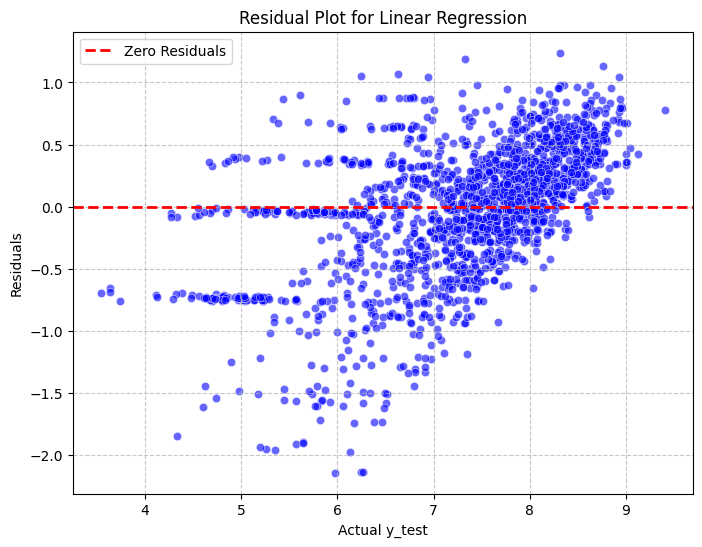

In [47]:
residue_lreg = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residue_lreg, c="blue", alpha=0.6, edgecolors="w", linewidth=0.5)
plt.title("Residual Plot for Linear Regression")
plt.xlabel("Actual y_test")
plt.ylabel("Residuals")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2, label="Zero Residuals")

plt.legend()

plt.grid(True, linestyle="--", alpha=0.7)

plt.show()


In [48]:
from sklearn.linear_model import Lasso, Ridge
ls = Lasso(alpha = 0.009)
ls = ls.fit(x_train, y_train)

In [49]:
ls.coef_

array([-0.        ,  0.9848907 ,  3.64651026,  0.03249564, -0.04162165,
        0.19997325])

In [50]:
ls.intercept_

-24.520235674914442

In [51]:
ls_pred = ls.predict(x_test)

In [52]:
rmse_LS = np.sqrt(metrics.mean_squared_error(y_test, ls_pred))
print('Root Mean Squared Error:',rmse_LS )

Root Mean Squared Error: 0.5517663802701465


In [53]:
from sklearn.metrics import r2_score
r2_score_LS = r2_score(y_test, ls_pred)
print('R2_Score:',r2_score_LS*100,"%" )

R2_Score: 71.50482703170576 %


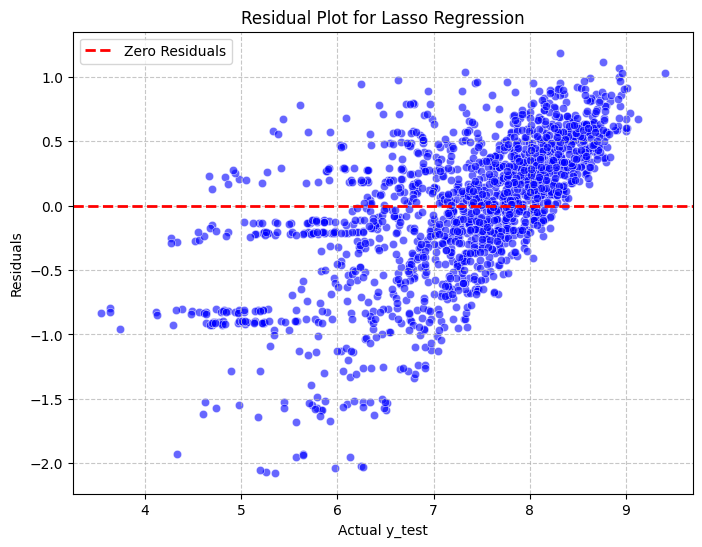

In [54]:
residue_lasso = y_test - ls_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residue_lasso, c="blue", alpha=0.6, edgecolors="w", linewidth=0.5)
plt.title("Residual Plot for Lasso Regression")
plt.xlabel("Actual y_test")
plt.ylabel("Residuals")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2, label="Zero Residuals")

plt.legend()

plt.grid(True, linestyle="--", alpha=0.7)

plt.show()


In [55]:
rr = Ridge(alpha = 0.009)
rr.fit(x_train, y_train)

Ridge(alpha=0.009)

In [56]:
rr_pred = rr.predict(x_test)

In [57]:
#Accuracy score check
r2_score_RR = r2_score(y_test, y_pred)
print('R2_Score:',r2_score_RR*100,"%" )

R2_Score: 72.95010719621587 %


In [58]:
#RMSE
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test, rr_pred))
rmse_ridge

0.5375929508668703

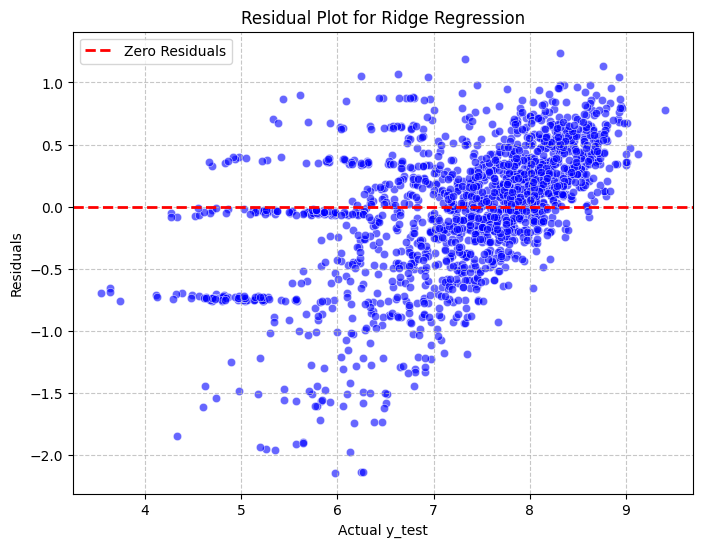

In [59]:
residue_rr = y_test - rr_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residue_rr, c="blue", alpha=0.6, edgecolors="w", linewidth=0.5)
plt.title("Residual Plot for Ridge Regression")
plt.xlabel("Actual y_test")
plt.ylabel("Residuals")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2, label="Zero Residuals")

plt.legend()

plt.grid(True, linestyle="--", alpha=0.7)

plt.show()


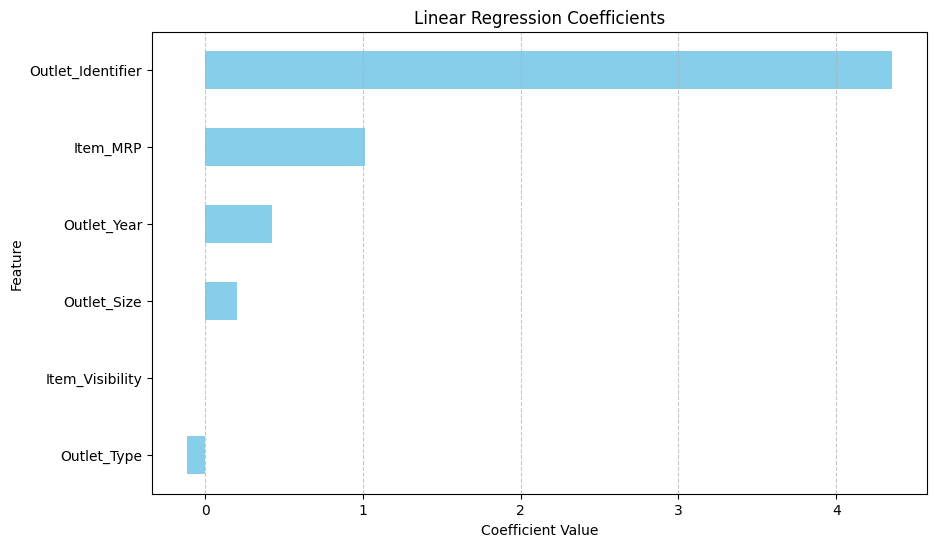

In [60]:
Lreg_coef = pd.Series(reg.coef_, index=x.columns)
plt.figure(figsize=(10, 6))
Lreg_coef.sort_values().plot(kind="barh", color="skyblue")
plt.title("Linear Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


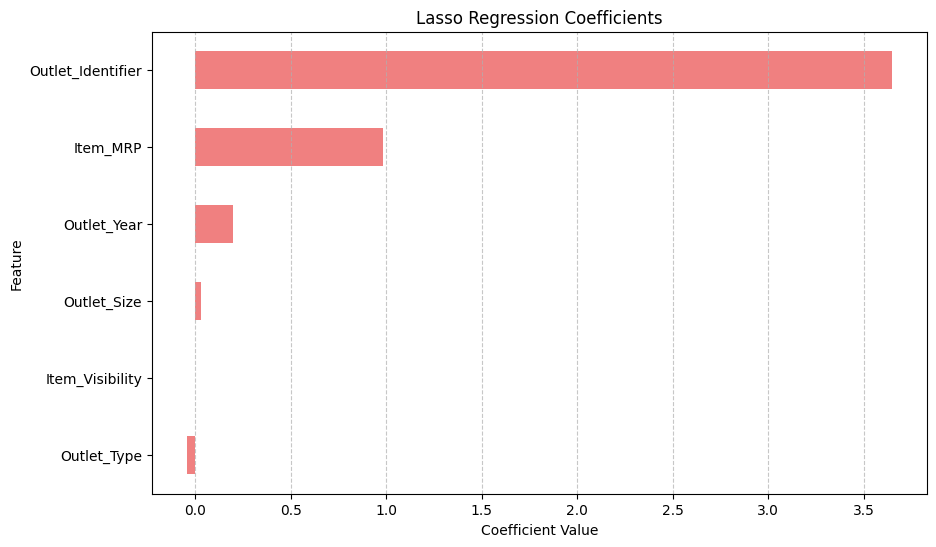

In [61]:
lasso_coef = pd.Series(ls.coef_, index=x.columns)

plt.figure(figsize=(10, 6))
lasso_coef.sort_values().plot(kind="barh", color="lightcoral")
plt.title("Lasso Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


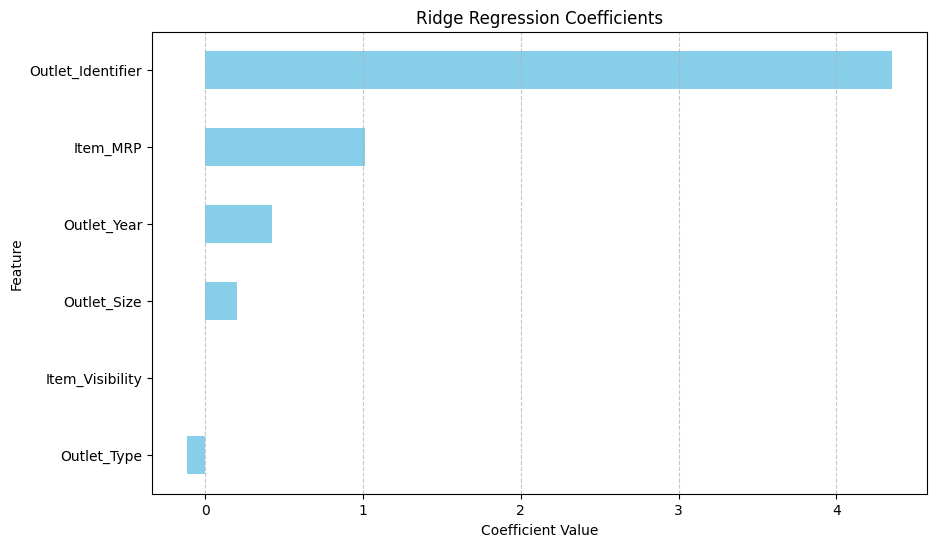

In [62]:
ridge_coef = pd.Series(rr.coef_, index=x.columns)

plt.figure(figsize=(10, 6))
ridge_coef.sort_values().plot(kind="barh", color="skyblue")
plt.title("Ridge Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


In [63]:
df1 = pd.DataFrame(columns=["Linear Regression", "Ridge Regression","Lasso Regression"])
for i in range(len(rr.coef_)):
    df1=df1.append({"Linear Regression":reg.coef_[i],"Ridge Regression":rr.coef_[i], "Lasso Regression":ls.coef_[i]}, ignore_index = True)
df1

C:\Users\aadya\AppData\Local\Temp\ipykernel_20524\2843785308.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append({"Linear Regression":reg.coef_[i],"Ridge Regression":rr.coef_[i], "Lasso Regression":ls.coef_[i]}, ignore_index = True)
C:\Users\aadya\AppData\Local\Temp\ipykernel_20524\2843785308.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append({"Linear Regression":reg.coef_[i],"Ridge Regression":rr.coef_[i], "Lasso Regression":ls.coef_[i]}, ignore_index = True)
C:\Users\aadya\AppData\Local\Temp\ipykernel_20524\2843785308.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append({"Linear Regression":reg.coef_[i],"Ridge Regression":rr.coef_[i], "Lasso Regression":ls.coef_[i]}, ignore_ind

,Linear Regression,Ridge Regression,Lasso Regression
0,-0.001368,-0.001376,-0.000000
1,1.016079,1.016074,0.984891
2,4.351069,4.350739,3.646510
3,0.202440,0.202388,0.032496
4,-0.114157,-0.114127,-0.041622
5,0.425280,0.425214,0.199973


Deciding Best Fit Model
RMSE:

Linear Regression: 0.5375914591271844

Lasso Regression: 0.5517663802701465

Ridge Regression: 0.5375929508668702

r2_score:

Linear Regression: 72.95010719621588 %

Lasso Regression: 71.50482703170576 %

Ridge Regression: 72.95010719621588 %

A model is said to be best fit if r2_score is closer to 100% and has a better RMSE score.

1) Lasso regression has lower accuracy than Linear and Ridge Regression.

2) Ridge regression and Linear regression have similar R2_Score values. But Linear Regression model has better RMSE value.

Therefore, the best fit model for the given dataset is: LINEAR REGRESSION


In [64]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year
8523,9,20.750,9185,0.007565,1989,107.8622,1550,4655,3980,9294,NaN,21
8524,9,8.300,5019,0.038428,1136,87.3198,1543,7996,4641,9294,NaN,13
8525,9,14.600,9185,0.099575,280,241.7538,925,7996,5583,1805,NaN,22
8526,9,7.315,9185,0.015388,1989,155.0340,1543,7996,4641,9294,NaN,13
8527,9,13.600,5019,0.118599,1136,234.2300,1559,4655,5583,1559,NaN,35


In [65]:
test= test.drop(["Item_Outlet_Sales"],axis=1)
test_= test.drop(['Item_Identifier','Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type'],axis=1)

In [66]:
test_.head()

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_Year
8523,0.007565,107.8622,1550,4655,9294,21
8524,0.038428,87.3198,1543,7996,9294,13
8525,0.099575,241.7538,925,7996,1805,22
8526,0.015388,155.0340,1543,7996,9294,13
8527,0.118599,234.2300,1559,4655,1559,35


In [67]:
test_.skew()

Item_Visibility      1.307908
Item_MRP             0.136182
Outlet_Identifier   -2.244334
Outlet_Size         -0.803264
Outlet_Type         -0.650193
Outlet_Year          0.396306
dtype: float64

In [68]:
for i in test_.columns:
    test_[i] =np.log(test_[i])

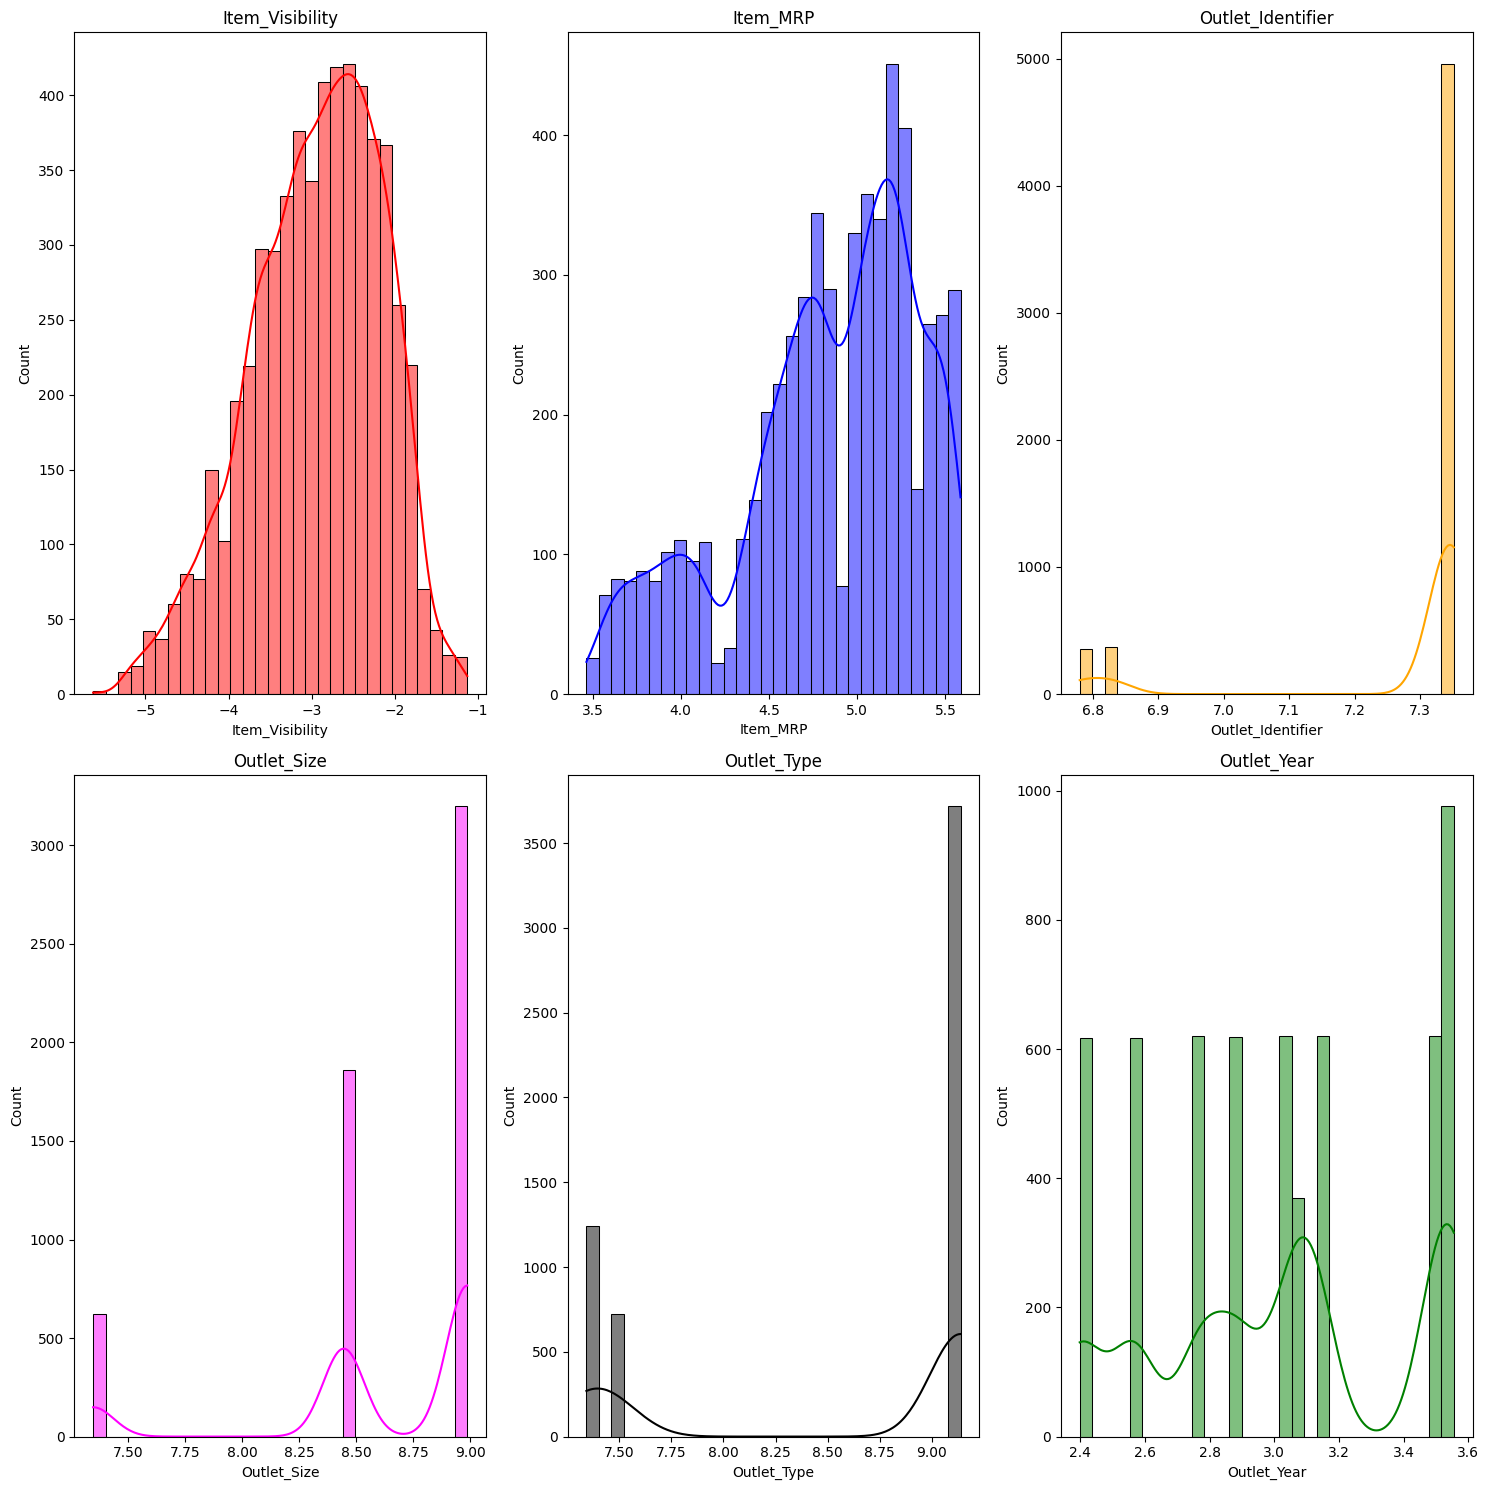

In [69]:
fig, ax = plt.subplots(2, 3, figsize=(15, 15))

colors = ["red", "blue", "orange", "magenta", "black", "green"]

features = ["Item_Visibility", "Item_MRP", "Outlet_Identifier",
            "Outlet_Size", "Outlet_Type", "Outlet_Year"]

for i in range(2):
    for j in range(3):
        if (i * 3 + j) < len(features):
            sns.histplot(test_[features[i * 3 + j]], kde=True, ax=ax[i, j], color=colors[i * 3 + j], bins=30)
            ax[i, j].set_title(features[i * 3 + j])

plt.tight_layout()

plt.show()



In [70]:
test_.head()

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_Year
8523,-4.884245,4.680854,7.346010,8.445697,9.137124,3.044522
8524,-3.258977,4.469577,7.341484,8.986697,9.137124,2.564949
8525,-2.306845,5.487920,6.829794,8.986697,7.498316,3.091042
8526,-4.174142,5.043644,7.341484,8.986697,9.137124,2.564949
8527,-2.132005,5.456304,7.351800,8.445697,7.351800,3.555348


In [71]:
item_outsale_pred = reg.predict(test_)
item_outsale_pred

array([7.35563223, 7.02460759, 6.24244119, ..., 7.48852756, 7.93722829,
       7.08415617])

In [72]:
actual_item_outsale = np.exp(item_outsale_pred+1)
actual_item_outsale

array([4254.07330943, 3055.22216457, 1397.50137008, ..., 4858.70663984,
       7610.07485536, 3242.68241806])

In [73]:
test["Item_Outlet_Sales"] = actual_item_outsale

In [74]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Year,Item_Outlet_Sales
8523,9,20.750,9185,0.007565,1989,107.8622,1550,4655,3980,9294,21,4254.073309
8524,9,8.300,5019,0.038428,1136,87.3198,1543,7996,4641,9294,13,3055.222165
8525,9,14.600,9185,0.099575,280,241.7538,925,7996,5583,1805,22,1397.501370
8526,9,7.315,9185,0.015388,1989,155.0340,1543,7996,4641,9294,13,5481.623853
8527,9,13.600,5019,0.118599,1136,234.2300,1559,4655,5583,1559,35,14559.921869
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10,10.500,5019,0.013496,1989,141.3154,1550,7996,3980,9294,23,6486.848411
14200,10,7.600,5019,0.142991,269,169.1448,1546,4655,5583,1546,11,6168.860049
14201,9,10.000,9185,0.073529,858,118.7440,1548,7996,4641,9294,18,4858.706640
14202,10,15.300,5019,0.088380,1084,214.6218,1543,7996,4641,9294,13,7610.074855


In [75]:
test.to_csv('testLR.csv')

In [76]:
vis = pd.read_csv("insight.csv")
vis.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Year
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,train,21
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,train,11
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,train,21
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,train,22
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,train,33


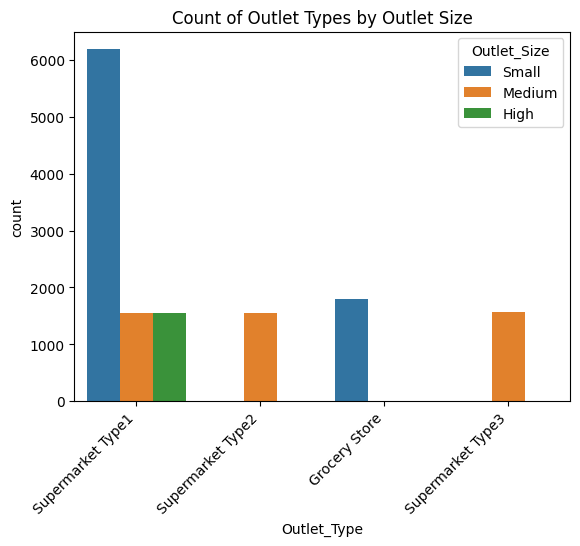

In [77]:
sns.countplot(data=vis, x="Outlet_Type", hue="Outlet_Size", hue_order=["Small", "Medium", "High"])
plt.xticks(rotation=45, ha="right") 
plt.title("Count of Outlet Types by Outlet Size")
plt.show()


C:\Users\aadya\AppData\Local\Temp\ipykernel_20524\2579329362.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vis, x="Outlet_Identifier", y="Item_Outlet_Sales", palette="viridis")


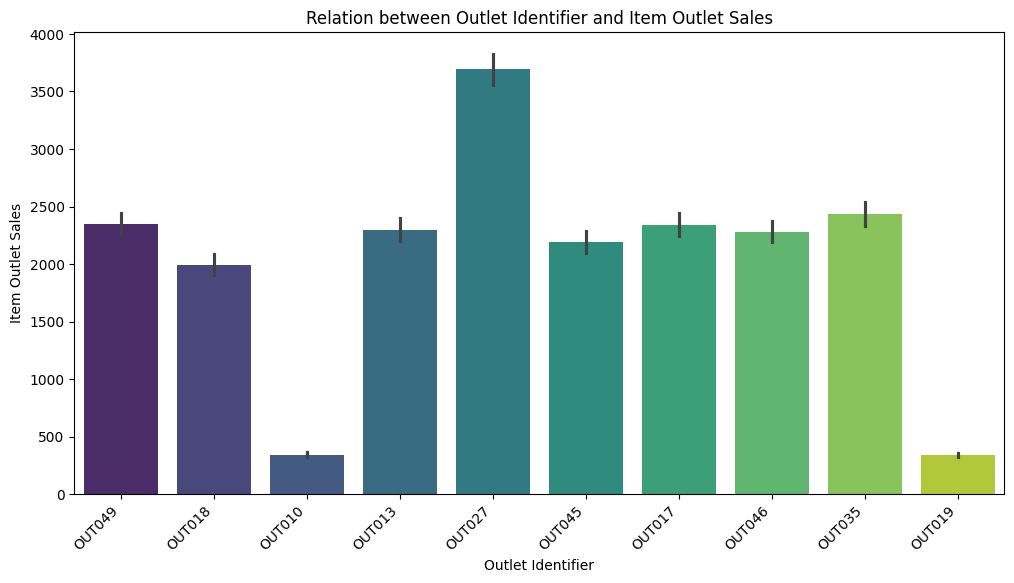

In [78]:
plt.figure(figsize=(12, 6))
sns.barplot(data=vis, x="Outlet_Identifier", y="Item_Outlet_Sales", palette="viridis")
plt.xticks(rotation=45, ha="right") 
plt.xlabel("Outlet Identifier")
plt.ylabel("Item Outlet Sales")
plt.title("Relation between Outlet Identifier and Item Outlet Sales")
plt.show()


C:\Users\aadya\AppData\Local\Temp\ipykernel_20524\2231053142.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vis, x="Outlet_Size", y="Item_Outlet_Sales", palette="viridis")


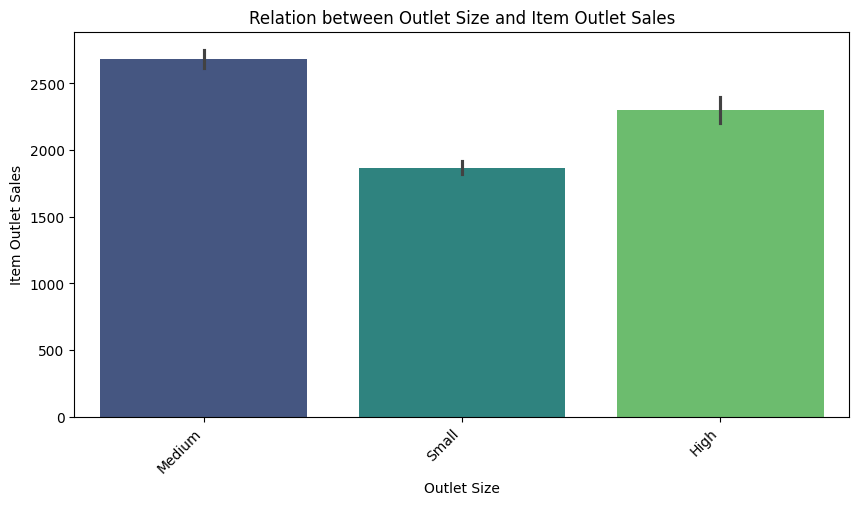

In [79]:
plt.figure(figsize=(10, 5))
sns.barplot(data=vis, x="Outlet_Size", y="Item_Outlet_Sales", palette="viridis")
plt.xlabel("Outlet Size")
plt.ylabel("Item Outlet Sales")
plt.title("Relation between Outlet Size and Item Outlet Sales")
plt.xticks(rotation=45, ha="right") 
plt.show()


C:\Users\aadya\AppData\Local\Temp\ipykernel_20524\420916348.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vis, x="Outlet_Type", y="Item_Outlet_Sales", palette="muted")


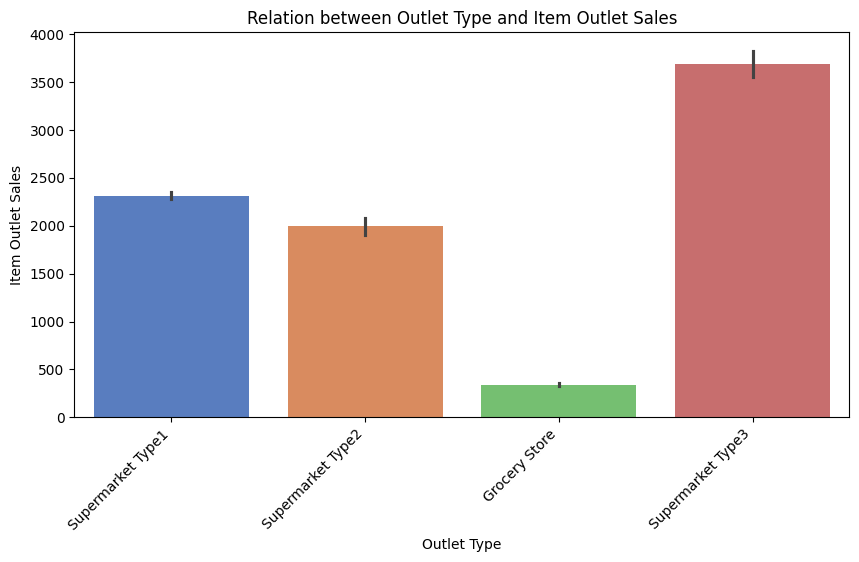

In [80]:
plt.figure(figsize=(10, 5))
sns.barplot(data=vis, x="Outlet_Type", y="Item_Outlet_Sales", palette="muted")
plt.xlabel("Outlet Type")
plt.ylabel("Item Outlet Sales")
plt.title("Relation between Outlet Type and Item Outlet Sales")
plt.xticks(rotation=45, ha="right") 
plt.show()


<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

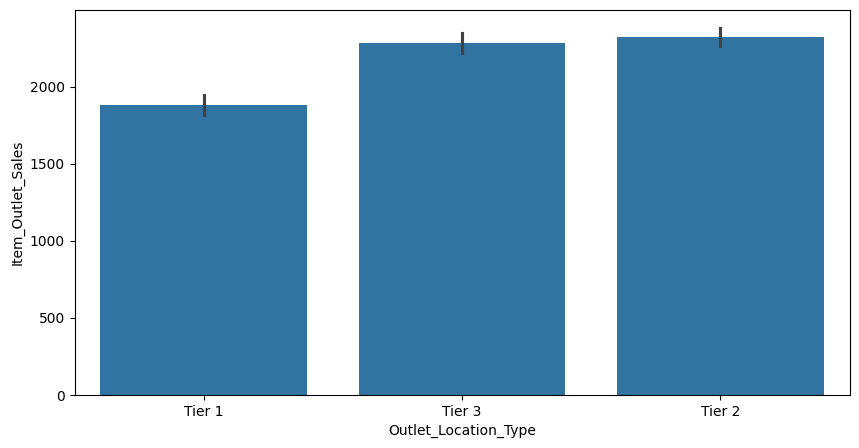

In [81]:
plt.figure(figsize = (10,5))
sns.barplot(data = vis, x = "Outlet_Location_Type", y= "Item_Outlet_Sales")

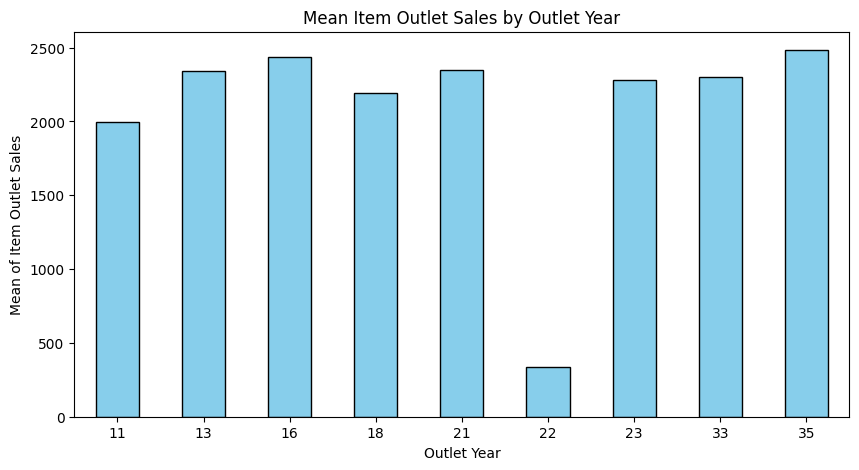

In [82]:
plt.figure(figsize=(10, 5))
mean_sales_by_year = vis.groupby("Outlet_Year")["Item_Outlet_Sales"].mean()
mean_sales_by_year.plot(kind="bar", color="skyblue", edgecolor="black")  
plt.xlabel("Outlet Year")
plt.ylabel("Mean of Item Outlet Sales")
plt.title("Mean Item Outlet Sales by Outlet Year")
plt.xticks(rotation=0)  
plt.show()


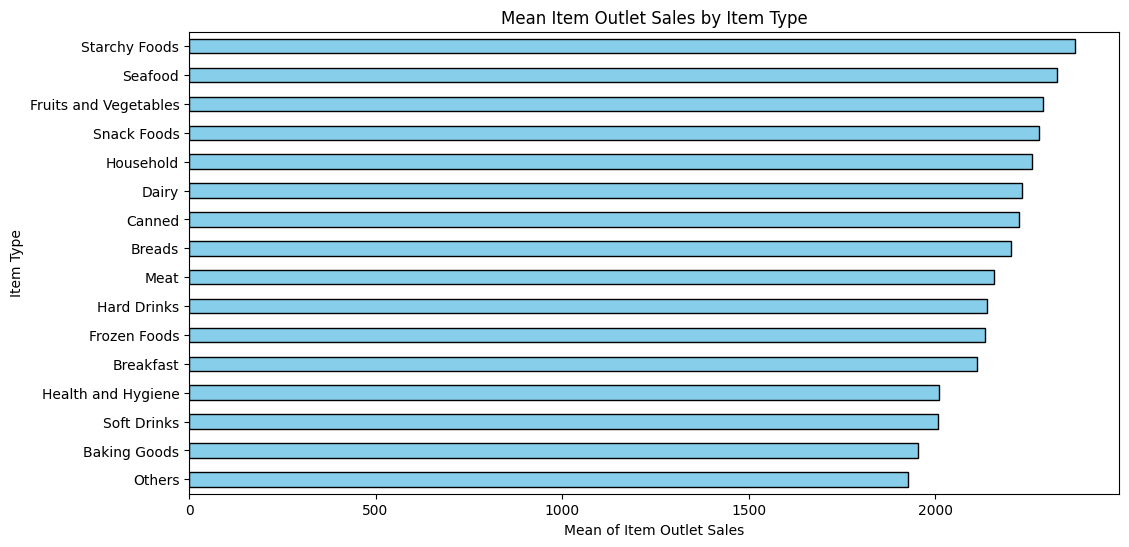

In [83]:
plt.figure(figsize=(12, 6))
mean_sales_by_item_type = vis.groupby("Item_Type")["Item_Outlet_Sales"].mean()
mean_sales_by_item_type.sort_values().plot(kind="barh", color="skyblue", edgecolor="black") 
plt.xlabel("Mean of Item Outlet Sales")
plt.ylabel("Item Type")
plt.title("Mean Item Outlet Sales by Item Type")
plt.show()


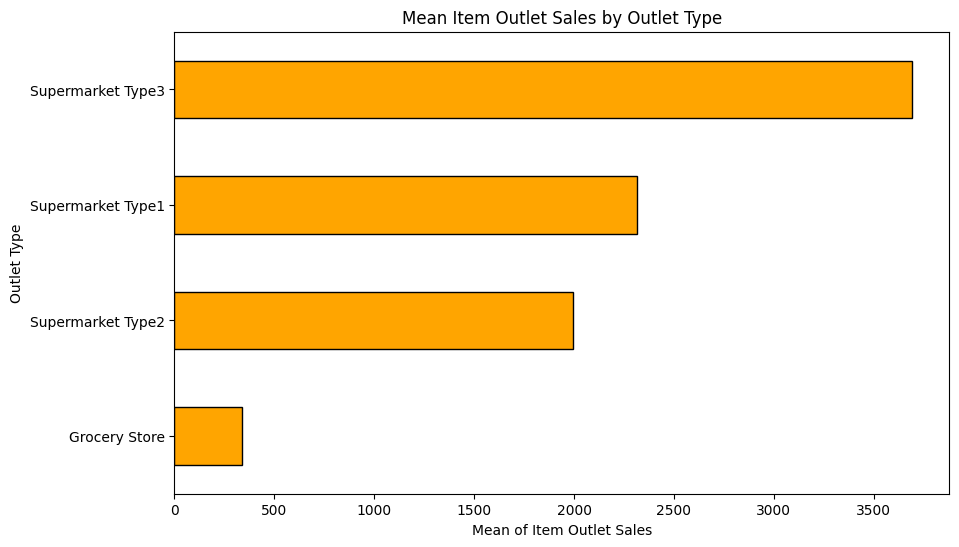

In [84]:
plt.figure(figsize=(10, 6))
mean_sales_by_outlet_type = vis.groupby("Outlet_Type")["Item_Outlet_Sales"].mean()
mean_sales_by_outlet_type.sort_values().plot(kind="barh", color="orange", edgecolor="black")
plt.xlabel("Mean of Item Outlet Sales")
plt.ylabel("Outlet Type")
plt.title("Mean Item Outlet Sales by Outlet Type")
plt.show()


C:\Users\aadya\AppData\Local\Temp\ipykernel_20524\3174676608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=vis, x="Item_Fat_Content", palette="pastel")


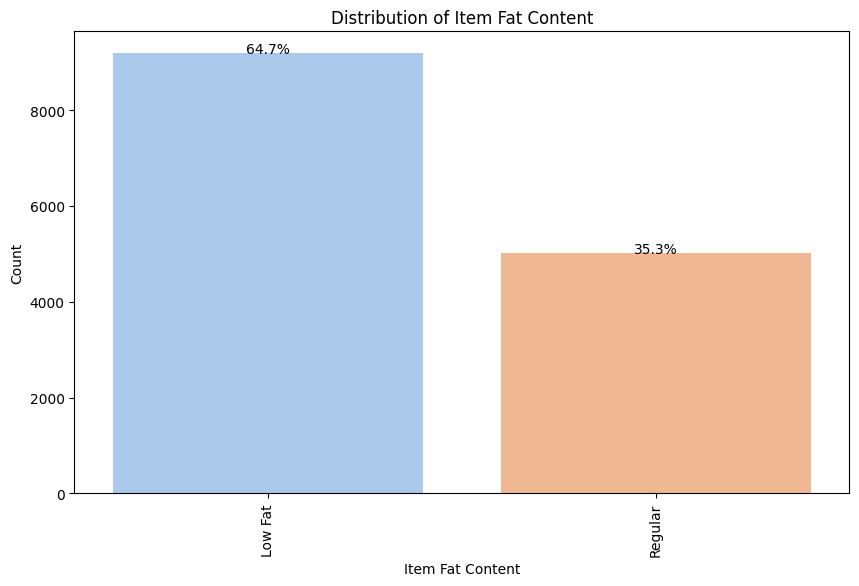

In [85]:
plt.figure(figsize=(10, 6))
sns.countplot(data=vis, x="Item_Fat_Content", palette="pastel")
plt.title("Distribution of Item Fat Content")
plt.xlabel("Item Fat Content")
plt.ylabel("Count")


total_count = len(vis["Item_Fat_Content"])
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height / total_count:.1%}', ha="center")

plt.xticks(rotation=90)
plt.show()


C:\Users\aadya\AppData\Local\Temp\ipykernel_20524\3407139864.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=vis, x="Outlet_Location_Type", palette="pastel")


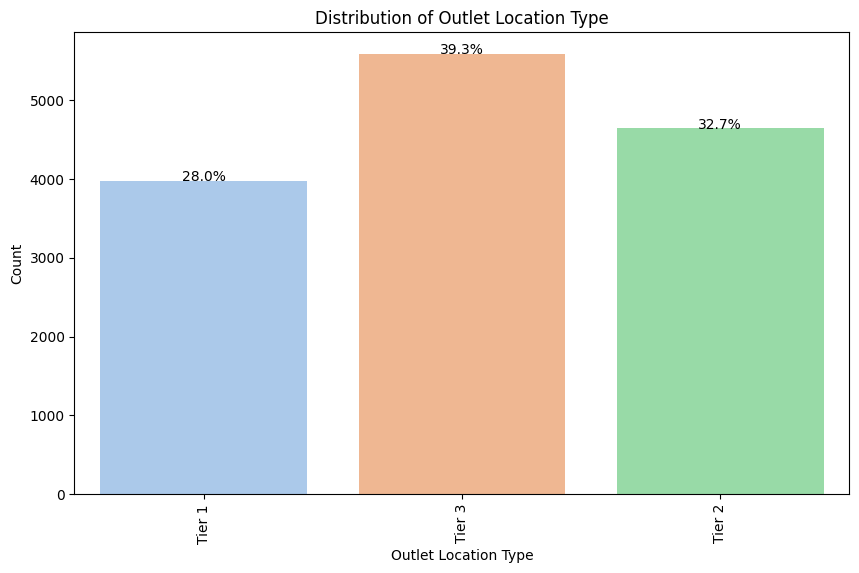

In [86]:
plt.figure(figsize=(10, 6))
sns.countplot(data=vis, x="Outlet_Location_Type", palette="pastel")
plt.title("Distribution of Outlet Location Type")
plt.xlabel("Outlet Location Type")
plt.ylabel("Count")

total_count = len(vis["Outlet_Location_Type"])
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height / total_count:.1%}', ha="center")

plt.xticks(rotation=90)
plt.show()


C:\Users\aadya\AppData\Local\Temp\ipykernel_20524\1329299422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=vis, x="Item_Type", palette="viridis")


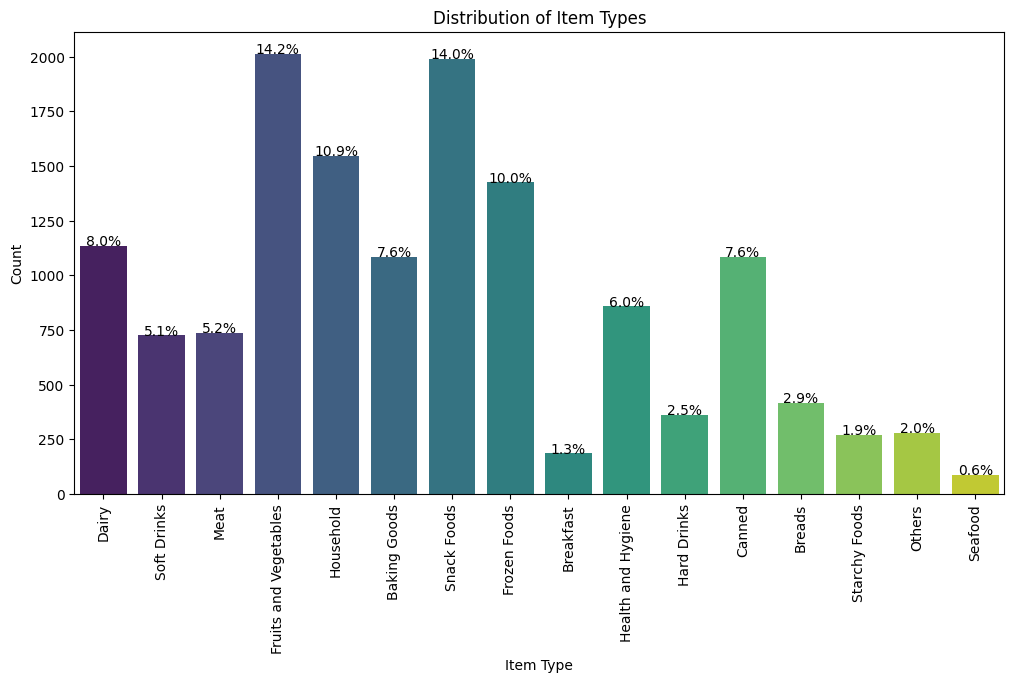

In [87]:
plt.figure(figsize=(12, 6))
sns.countplot(data=vis, x="Item_Type", palette="viridis")
plt.title("Distribution of Item Types")
plt.xlabel("Item Type")
plt.ylabel("Count")

total_count = len(vis["Item_Type"])
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height / total_count:.1%}', ha="center")

plt.xticks(rotation=90)
plt.show()


<Figure size 1000x600 with 0 Axes>

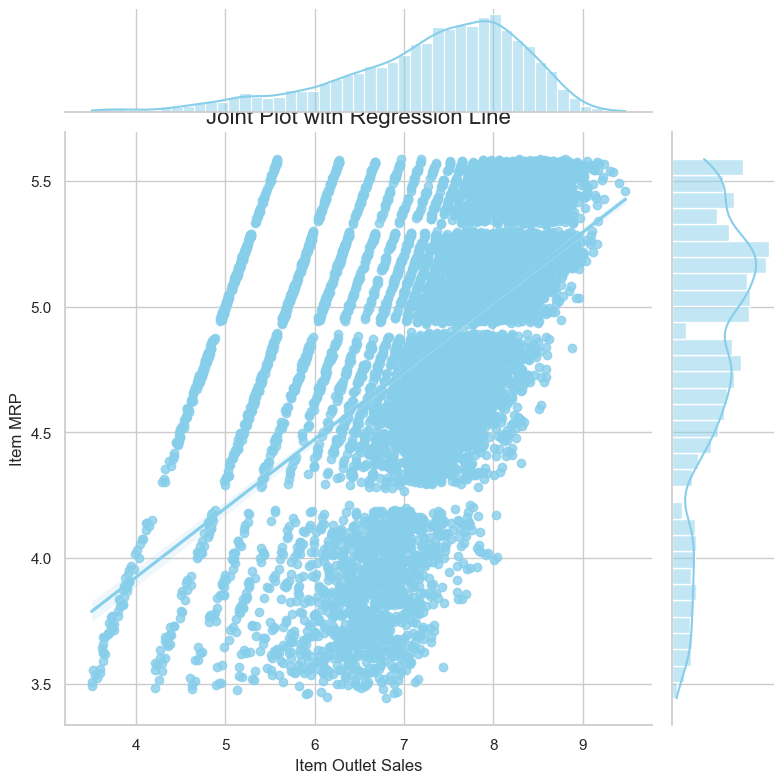

In [88]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.jointplot(x=train["Item_Outlet_Sales"], y=train["Item_MRP"], kind="reg", height=8, color='skyblue')
plt.xlabel("Item Outlet Sales", fontsize=12)
plt.ylabel("Item MRP", fontsize=12)
plt.title("Joint Plot with Regression Line", fontsize=16)
plt.show()


<Figure size 1000x600 with 0 Axes>

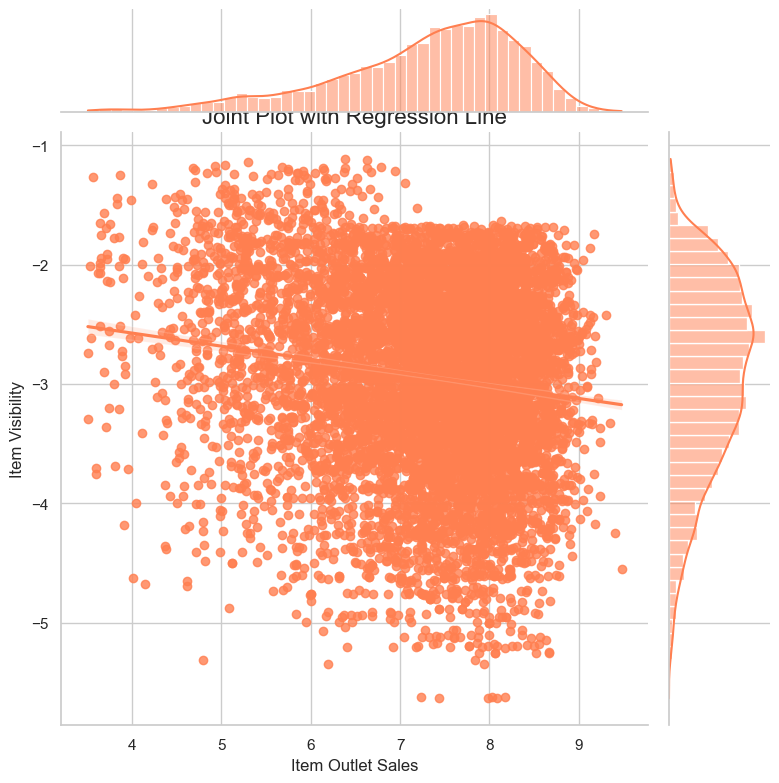

In [92]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.jointplot(x=train["Item_Outlet_Sales"], y=train["Item_Visibility"], kind="reg", height=8, color='coral')
plt.xlabel("Item Outlet Sales", fontsize=12)
plt.ylabel("Item Visibility", fontsize=12)
plt.title("Joint Plot with Regression Line", fontsize=16)
plt.show()
